In [1]:
import pandas as pd

df = pd.read_csv("foodhub_order.csv")
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [2]:
df.shape

(1898, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


There are no missing data in any of the colums as the total non-null count match with the total record count
order_id, customer_id, food_preparation_time, delivery_time are int type attributes, cost_of_the_order is float and the remaining (restaurant_name, cuisine_type, day_of_the_week, and rating is object type


In [4]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [5]:
df.describe(include=["object"])

,restaurant_name,cuisine_type,day_of_the_week,rating
count,1898,1898,1898,1898
unique,178,14,2,4
top,Shake Shack,American,Weekend,Not given
freq,219,584,1351,736


In [6]:
#Check if dataset has duplicate rows

print("number of duplicate row {}".format(df[df.duplicated()].shape[0]))

number of duplicate row 0


order_id
customer_id
restaurant_name
cuisine_type
cuisine_type is categorical. Data type: object
Total unique value 14
Unique Value - Total Count
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64


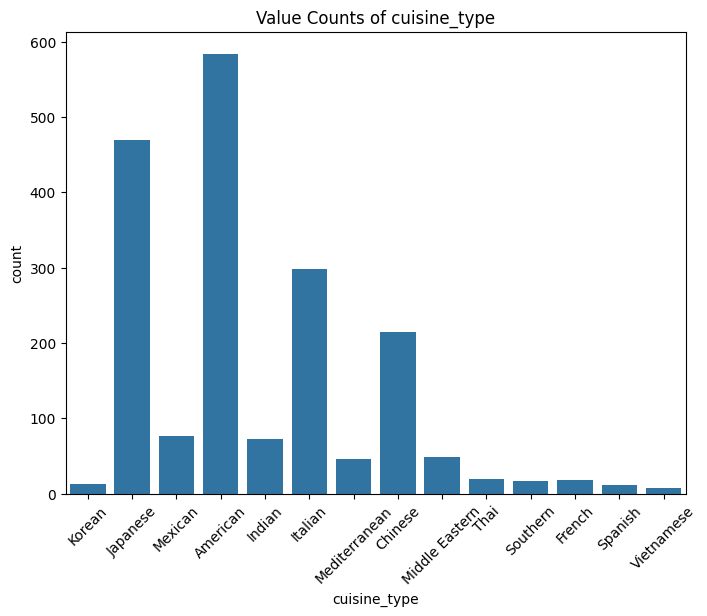

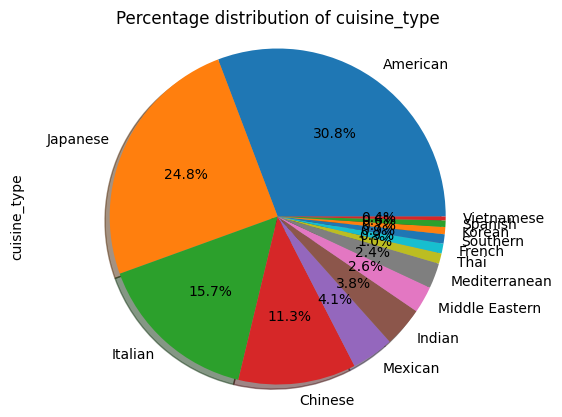

cost_of_the_order
cost_of_the_order is numeric. Data type: float64


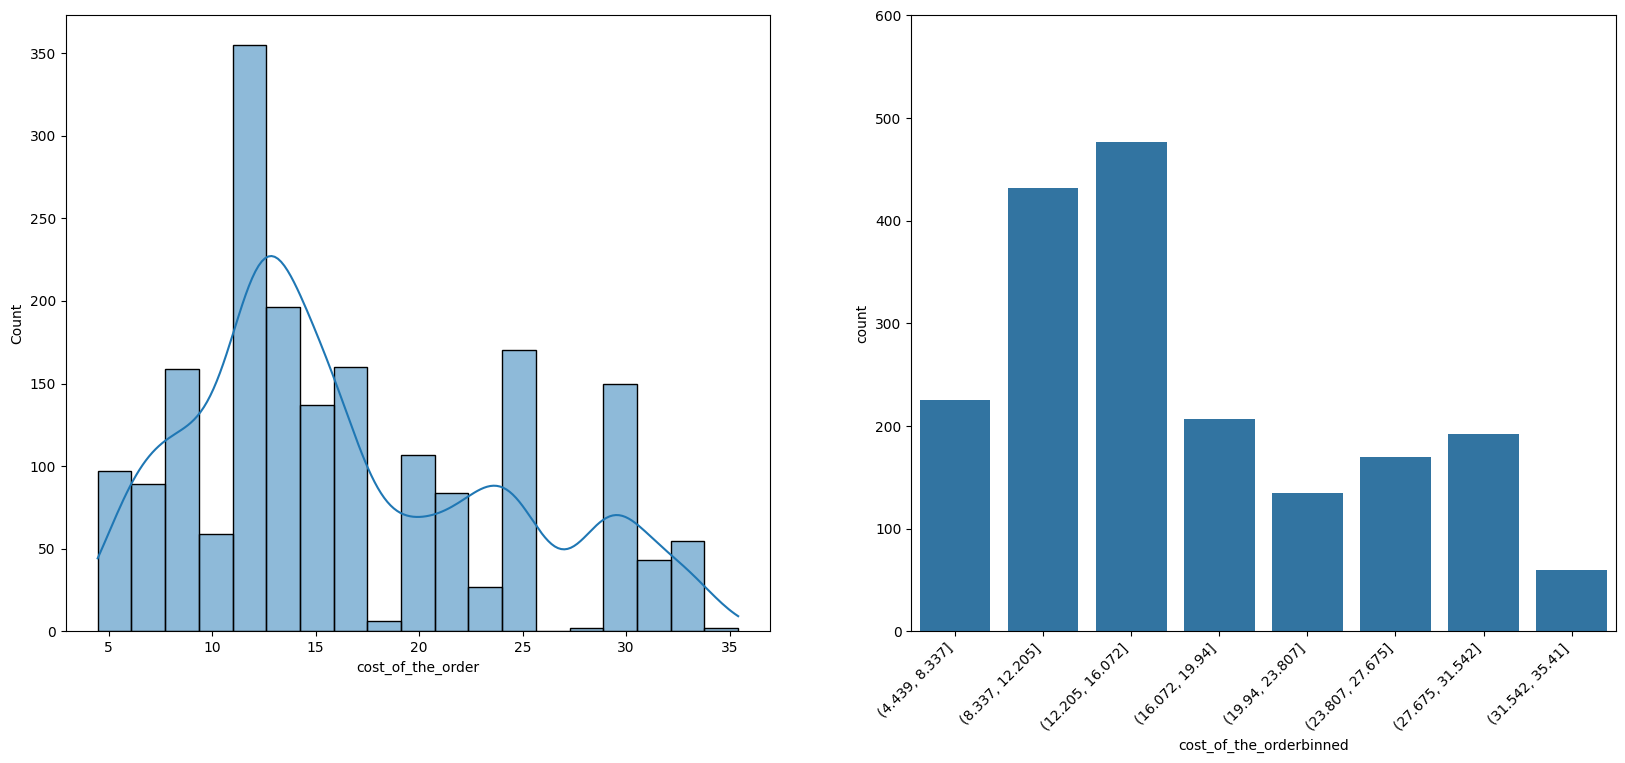

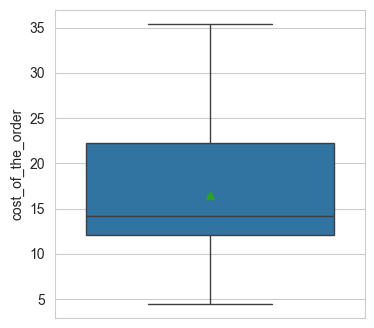

day_of_the_week
day_of_the_week is categorical. Data type: object
Total unique value 2
Unique Value - Total Count
Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64


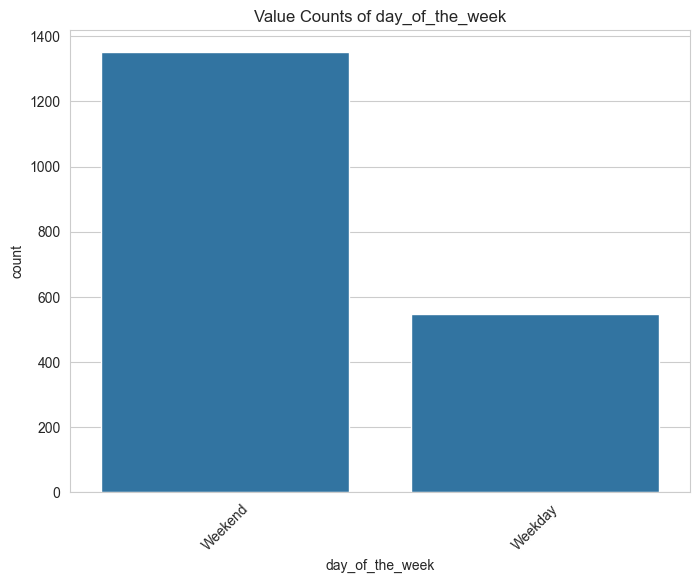

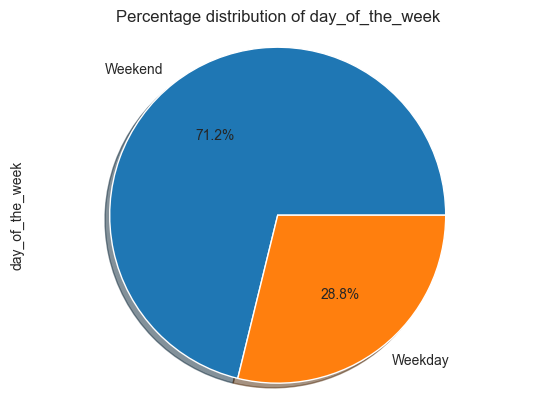

rating
rating is categorical. Data type: object
Total unique value 4
Unique Value - Total Count
Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64


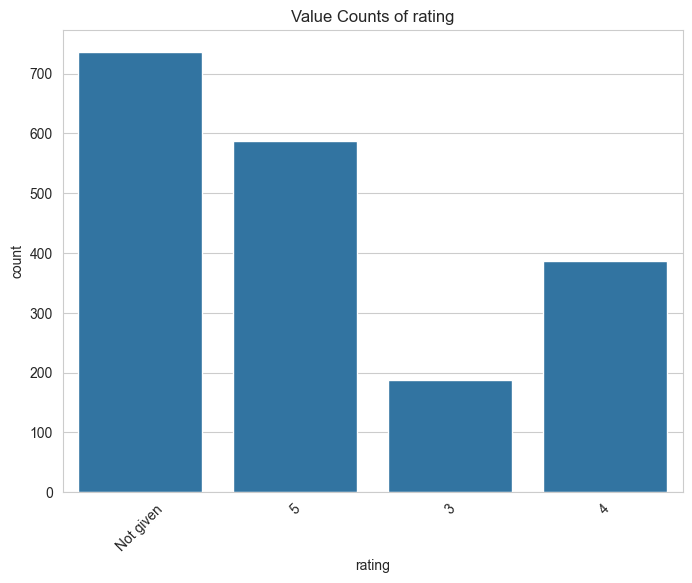

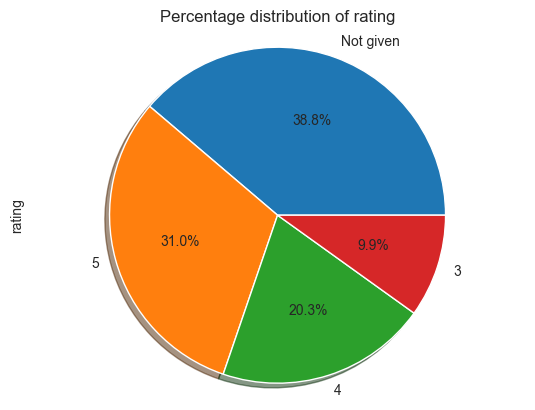

food_preparation_time
food_preparation_time is numeric. Data type: int64


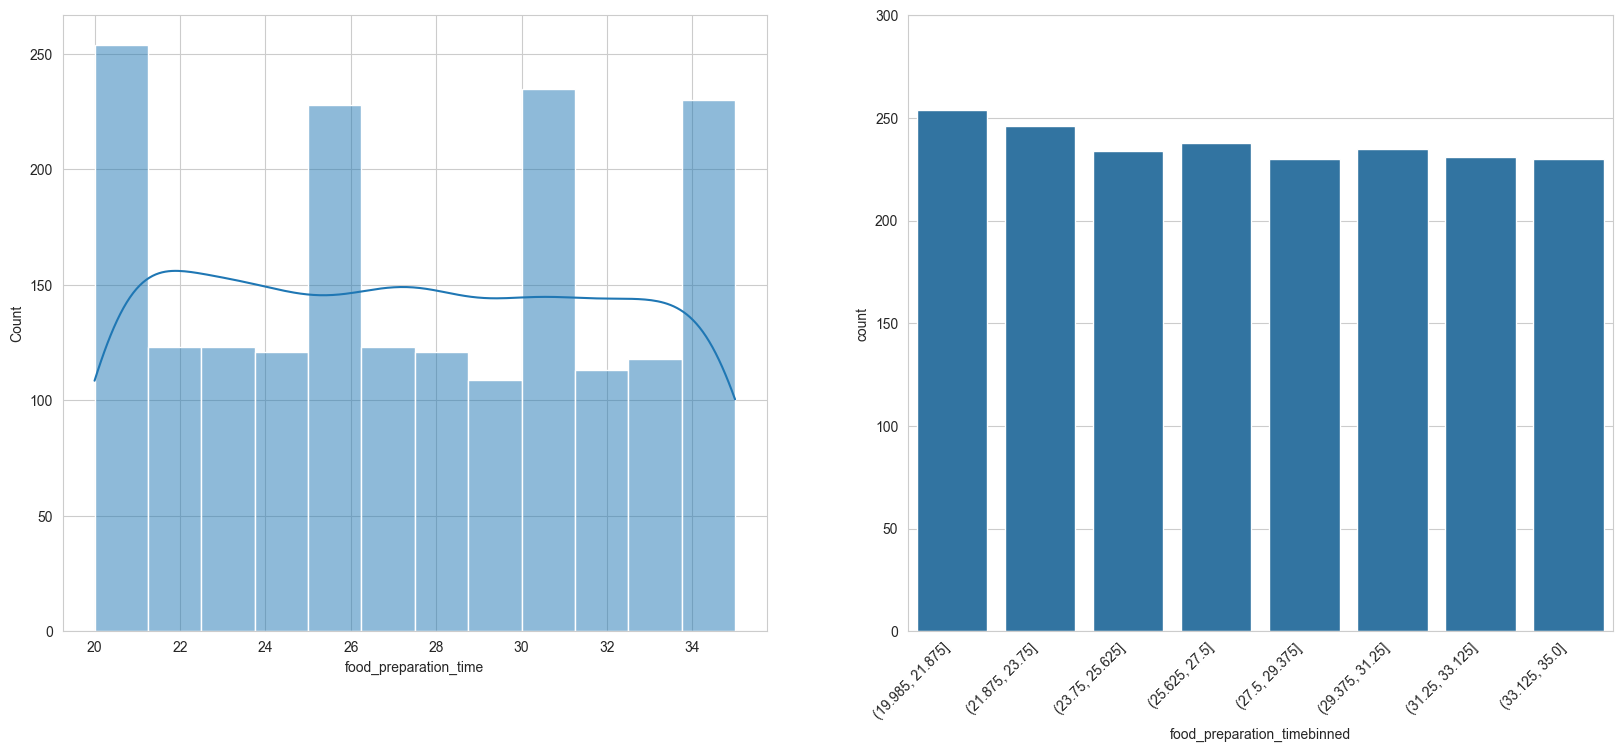

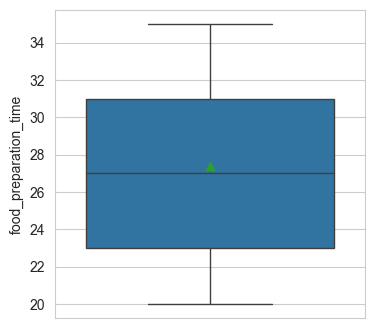

delivery_time
delivery_time is numeric. Data type: int64


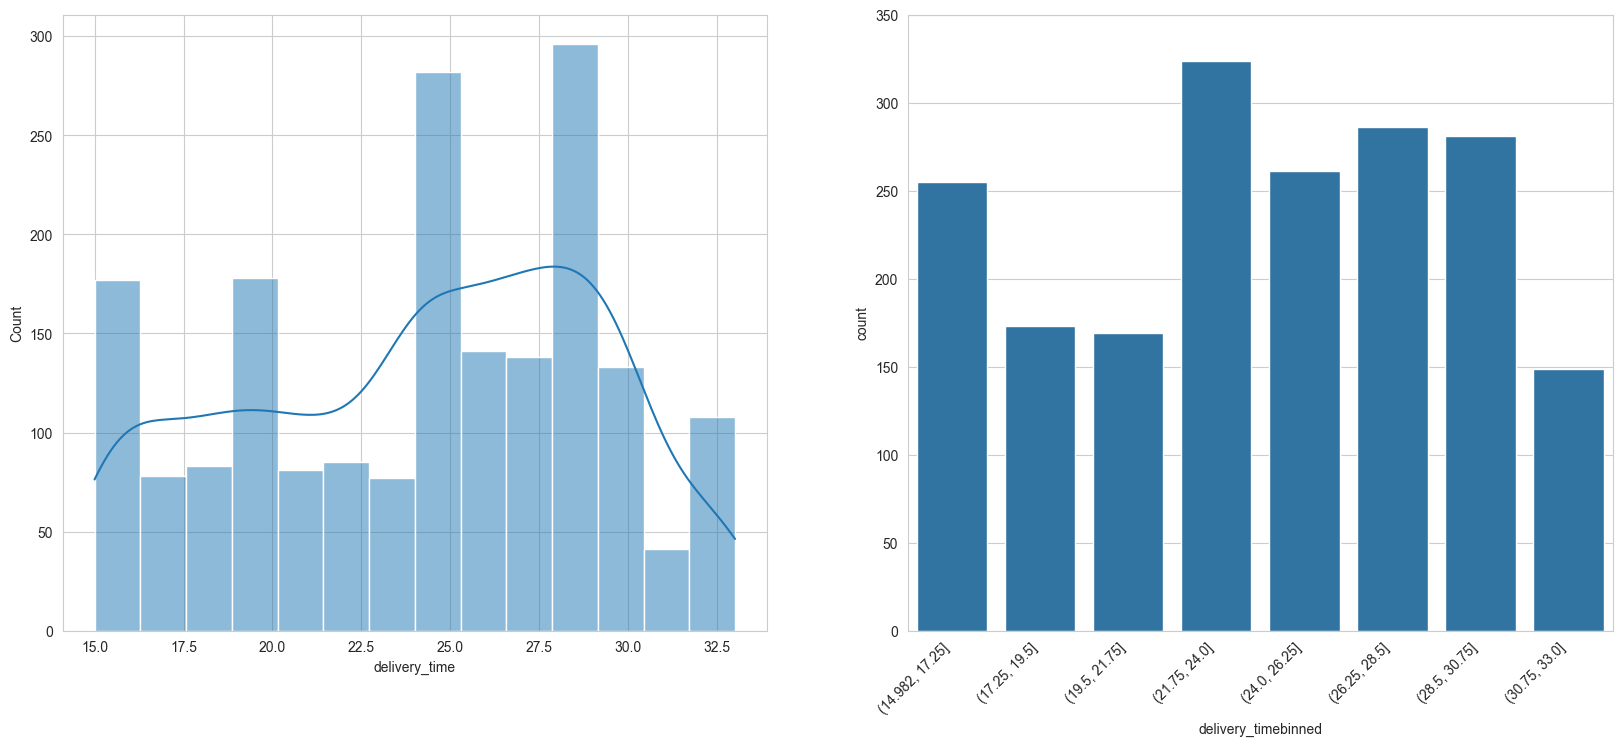

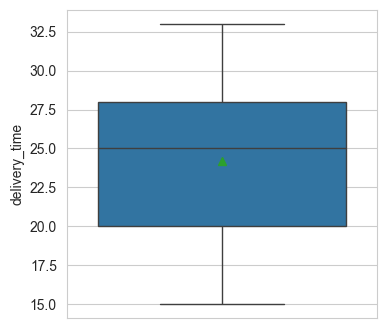

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


def pie_chart(df, column_name):
    
    column_data_type_name = df.dtypes[column_name].name
    is_numeric = True if column_data_type_name not in ["object", "string"] else False

    if not is_numeric:
        df_unique_value_count = df[column_name].value_counts()
        #counts = df['house_electricity'].value_counts(dropna=False)
        df_unique_value_count.plot.pie(autopct='%1.1f%%', labels=df_unique_value_count.index, shadow=True, textprops={'fontsize': 10})
        
        plt.title("Percentage distribution of {}".format(column_name))
        
        plt.axis('equal')
        plt.show()

def box_plot(df, y_column, x_column=None):
    #sns.boxplot(df, x_column, y_column)
    plt.figure(figsize=(4, 4))
    sns.set_style("whitegrid") 
    sns.boxplot(x = x_column, y = y_column, data = df,showmeans=True)
    plt.show()
    
def show_count_plot(df, column_name):
    column_data_type_name = df.dtypes[column_name].name
    is_numeric = True if column_data_type_name not in ["object", "string"] else False
    if not is_numeric:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=column_name)
        plt.title("Value Counts of {}".format(column_name))
        plt.xticks(rotation=45)
        plt.show()

def show_historgram_and_binned_count_plot(df, column_name, bins=8):
    df_cpy = df.copy()
    fig, ax =plt.subplots(1,2, figsize=(20,8))
    sns.histplot(data = df_cpy, x=column_name, kde=True, ax=ax[0])
    
    df_cpy["{}binned".format(column_name)] = pd.cut(df_cpy[column_name], bins=bins)
    sns.countplot(data=df_cpy, x="{}binned".format(column_name), ax=ax[1])
    ax[1].set_xticks(ax[1].get_xticks())
    ax[1].set_yticks(ax[1].get_yticks())
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()
    
def unique_values(df, column_name):
    column_data_type_name = df.dtypes[column_name].name
    is_numeric = True if column_data_type_name not in ["object", "string"] else False

    if not is_numeric:
        df_unique_value_count = df[column_name].value_counts()
        print("Total unique value {}".format(len(df_unique_value_count.index)))
        print("Unique Value - Total Count")
        print(df_unique_value_count)
        

def show_stat(df, column_name, bins=8):
    column_data_type_name = df.dtypes[column_name].name
    is_numeric = True if column_data_type_name not in ["object", "string"] else False

    if is_numeric:
        print("{} is numeric. Data type: {}".format(column_name, column_data_type_name))
        show_historgram_and_binned_count_plot(df, column_name, bins)
        box_plot(df, column_name)
    else:
        print("{} is categorical. Data type: {}".format(column_name, column_data_type_name))
        unique_values(df, column_name)
        show_count_plot(df, column_name)
        pie_chart(df, column_name)
      
exclude_columns = ['order_id', 'customer_id', 'restaurant_name']
for column in df.columns:
    print(column)
    if column not in exclude_columns:
        show_stat(df, column)
#show_stat(df, "rating")
#show_stat(df, "cost_of_the_order")


# Bi variate analysis

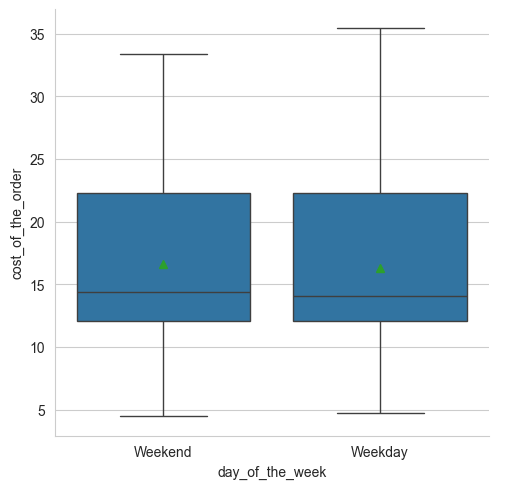

In [8]:
sns.catplot(data=df, x="day_of_the_week", y="cost_of_the_order",  kind="box", showmeans=True)
    

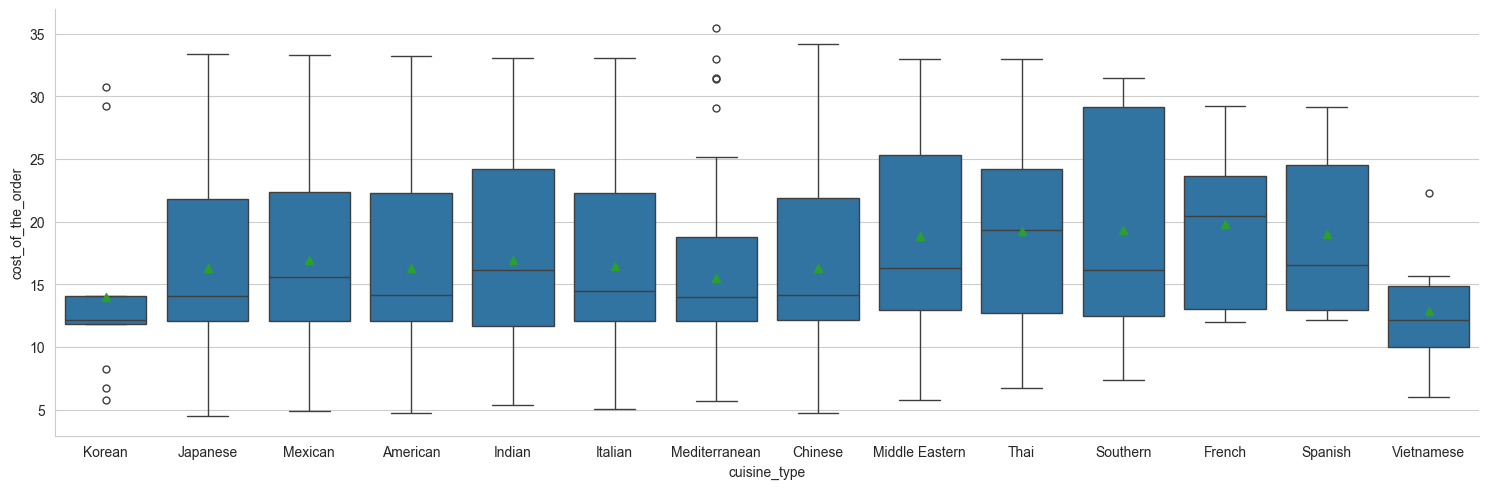

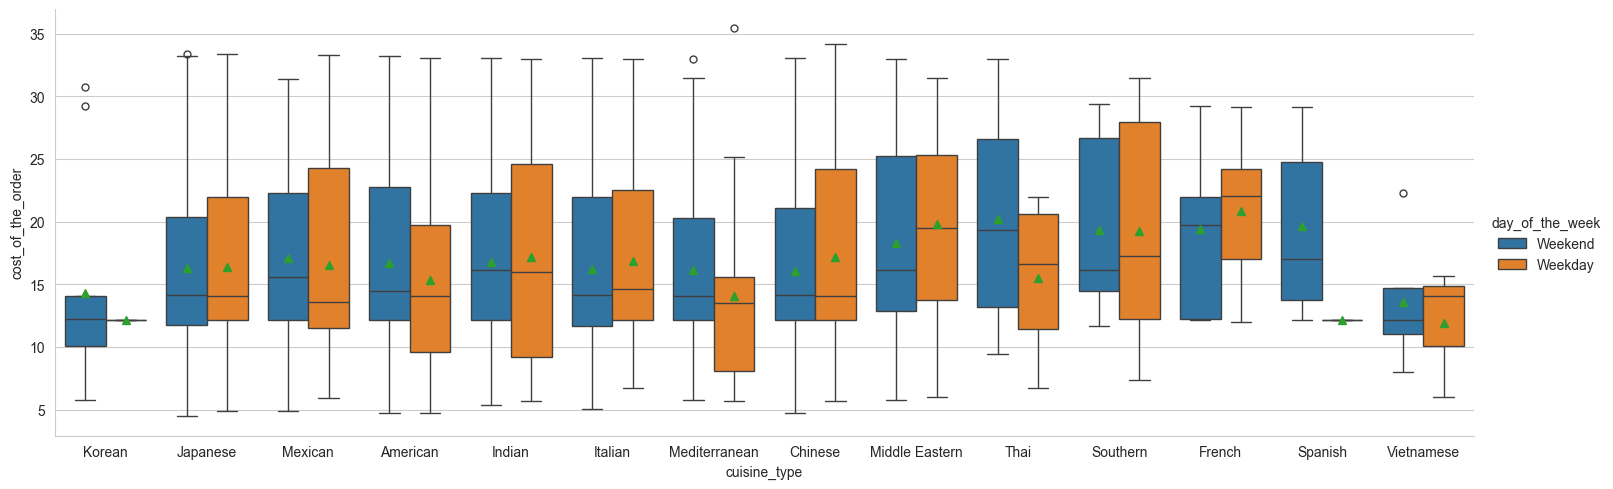

In [9]:
    column_with_top_n_values = lambda column, n : df[column].value_counts().index.to_list()[:n]
    popular_cusine = df[df["cuisine_type"].isin(column_with_top_n_values("cuisine_type", 5))]
    sns.catplot(data=df, x="cuisine_type", y="cost_of_the_order",  kind="box", height=5, aspect=3, showmeans=True)
    sns.catplot(data=df, x="cuisine_type", y="cost_of_the_order", hue="day_of_the_week", kind="box", height=5, aspect=3, showmeans=True)
    plt.show()

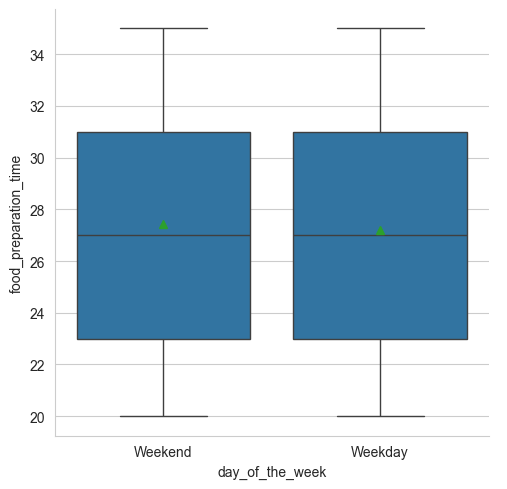

In [10]:
sns.catplot(data=df, x="day_of_the_week", y="food_preparation_time",  kind="box", showmeans=True)

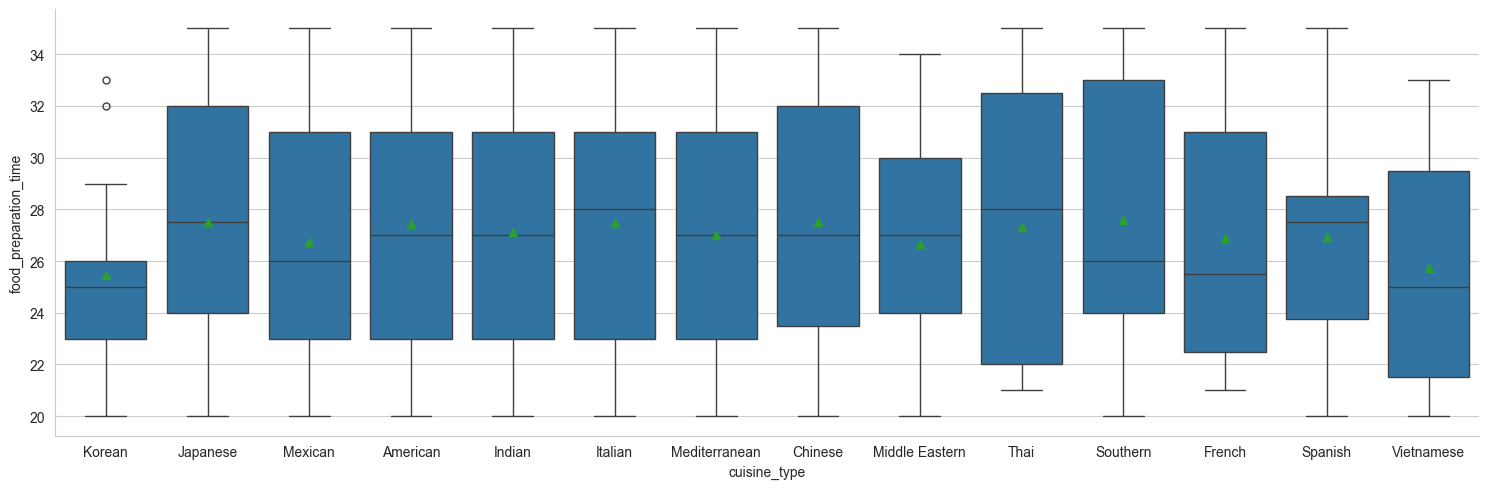

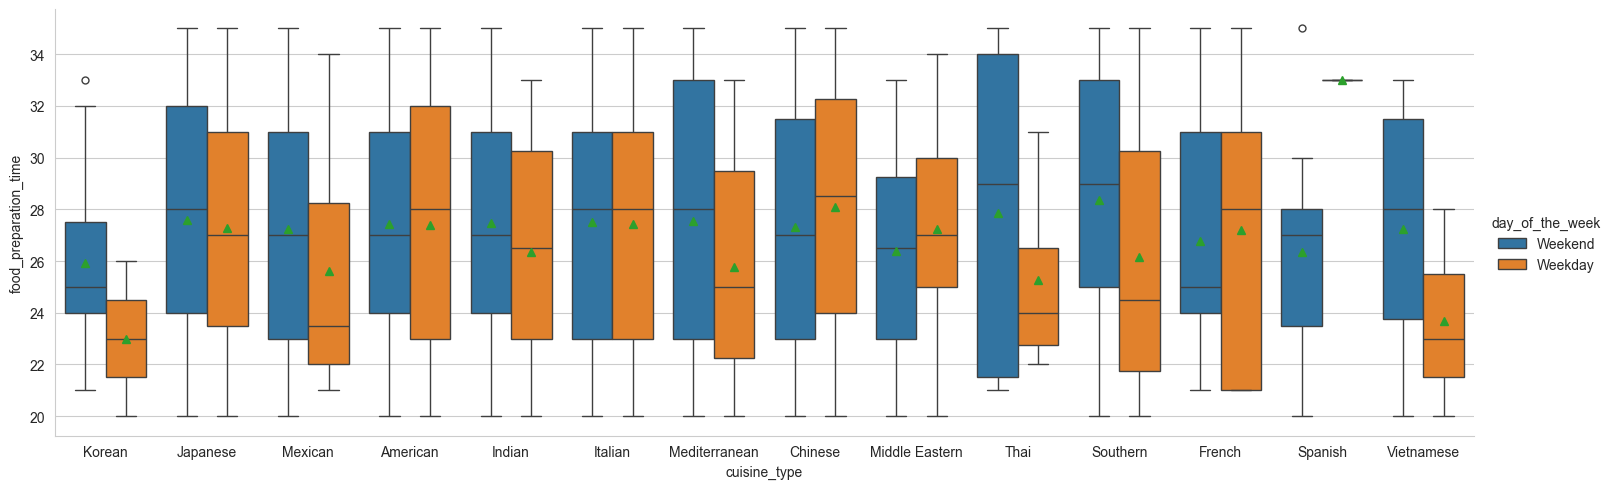

In [11]:
    sns.catplot(data=df, x="cuisine_type", y="food_preparation_time",  kind="box", height=5, aspect=3,showmeans=True)
    sns.catplot(data=df, x="cuisine_type", y="food_preparation_time", hue="day_of_the_week", kind="box", height=5, aspect=3, showmeans=True)
    plt.show()

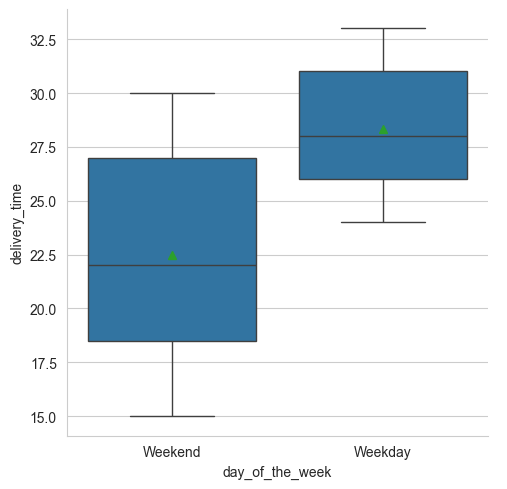

In [12]:
sns.catplot(data=df, x="day_of_the_week", y="delivery_time",  kind="box", showmeans=True)

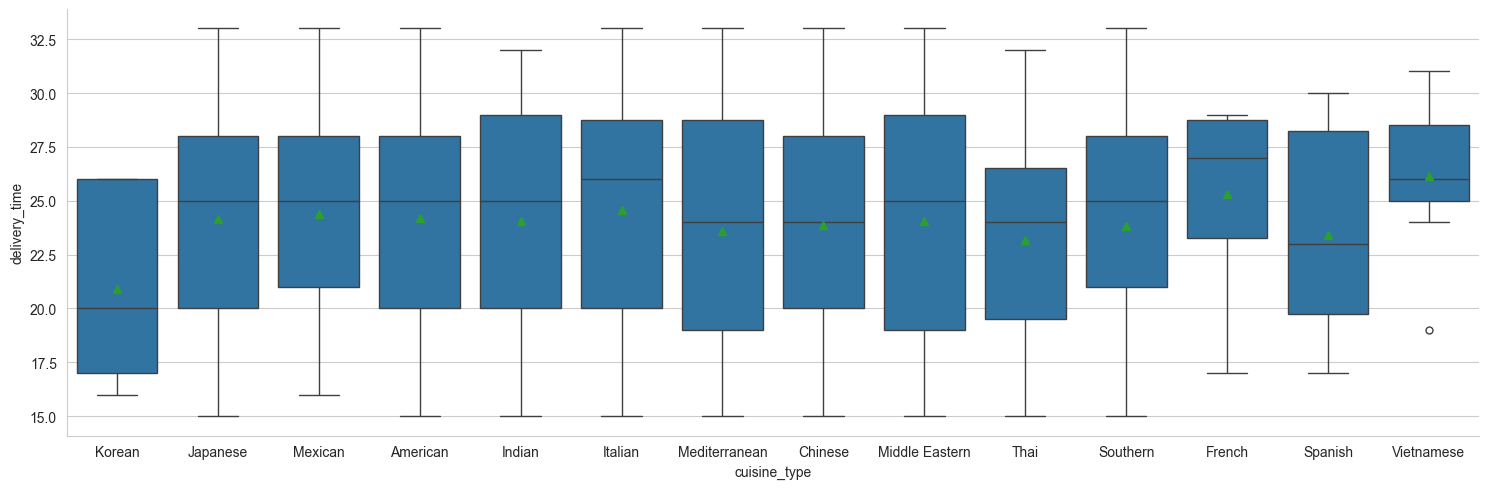

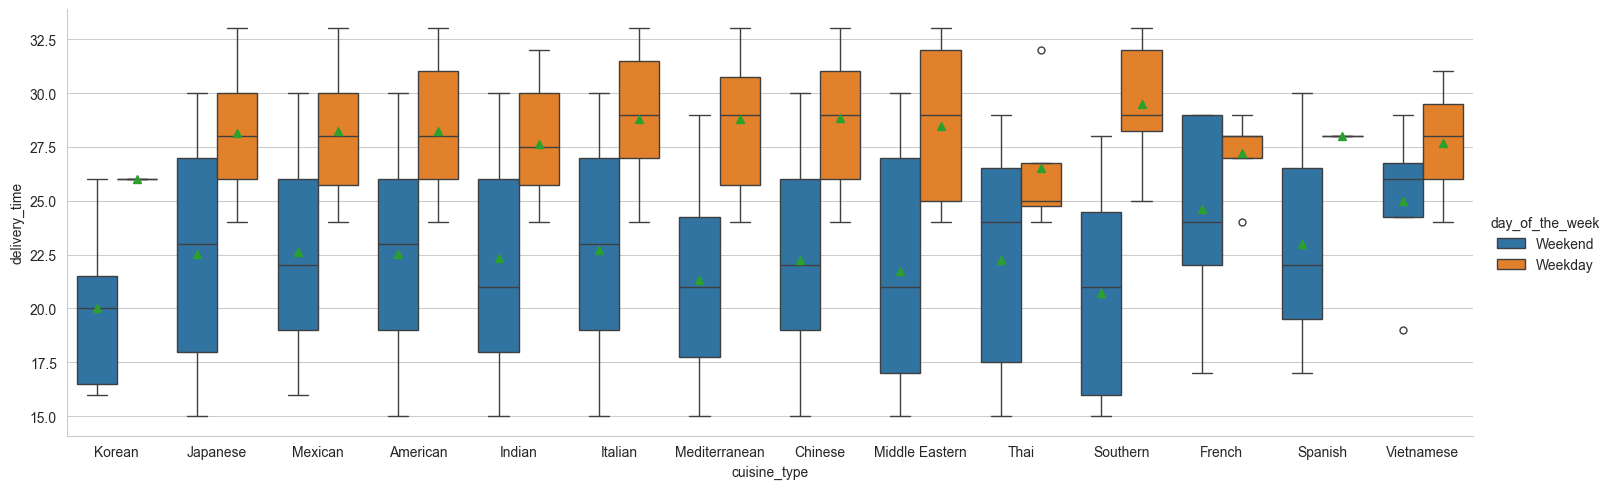

In [13]:
sns.catplot(data=df, x="cuisine_type", y="delivery_time",  kind="box", height=5, aspect=3, showmeans=True)
sns.catplot(data=df, x="cuisine_type", y="delivery_time", hue="day_of_the_week", kind="box", height=5, aspect=3, showmeans=True)

plt.show()

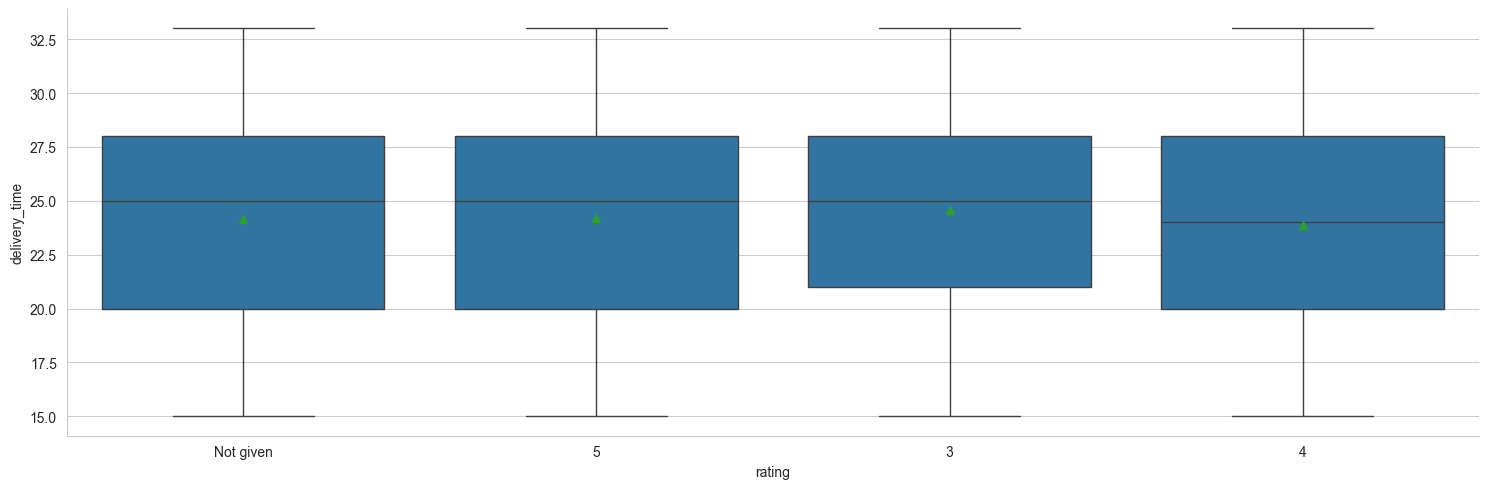

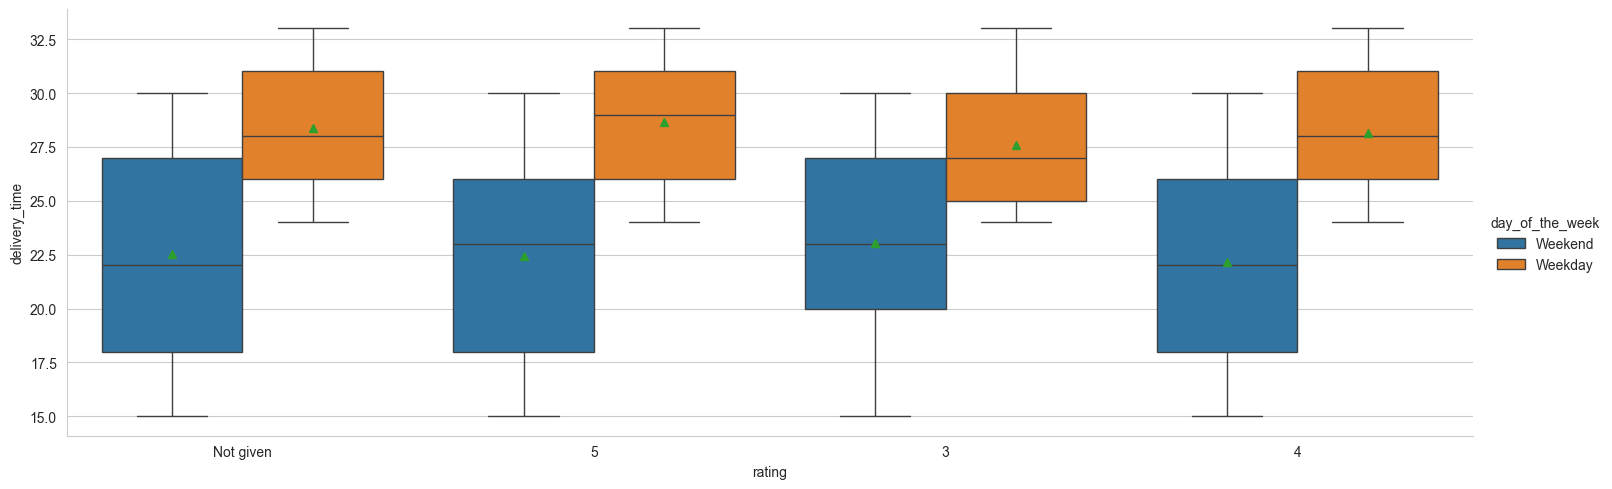

In [14]:
sns.catplot(data=df, x="rating", y="delivery_time",  kind="box", height=5, aspect=3, showmeans=True)
sns.catplot(data=df, x="rating", y="delivery_time", hue="day_of_the_week",  kind="box", height=5, aspect=3, showmeans=True)

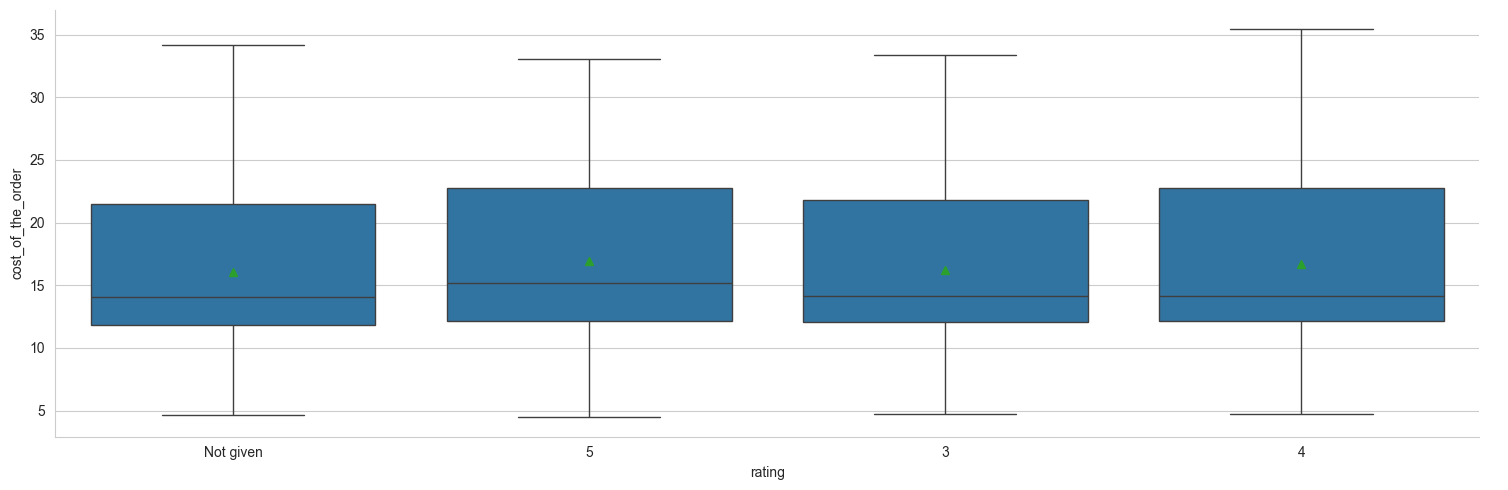

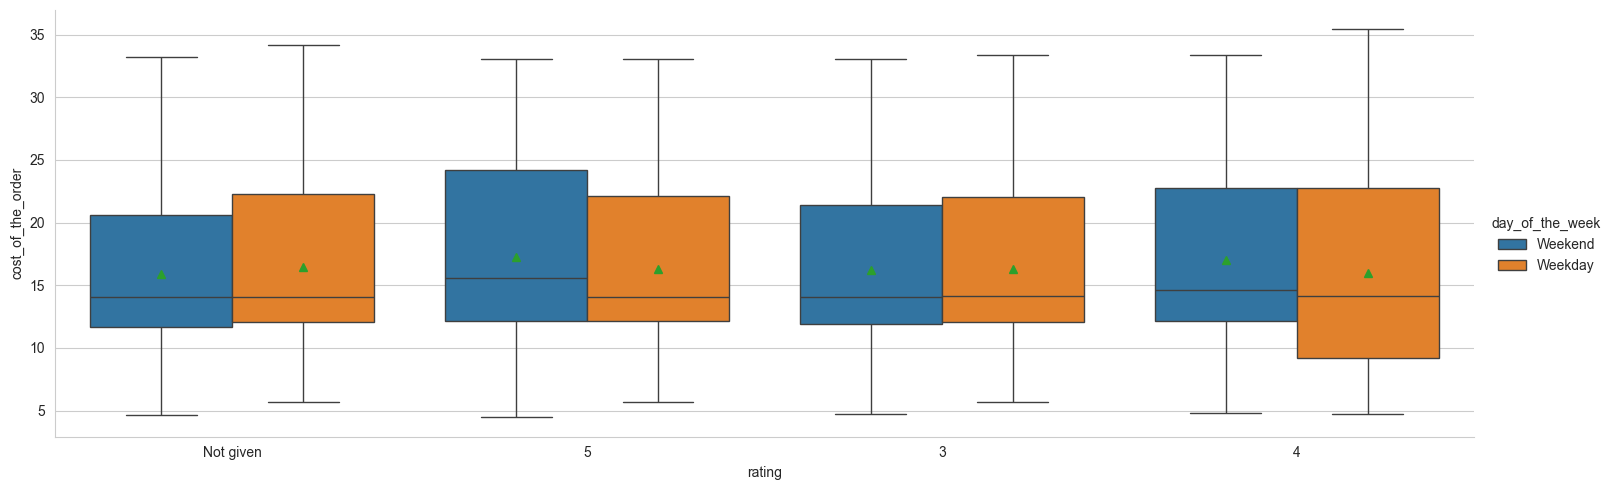

In [15]:
sns.catplot(data=df, x="rating", y="cost_of_the_order",  kind="box", height=5, aspect=3, showmeans=True)
sns.catplot(data=df, x="rating", y="cost_of_the_order", hue="day_of_the_week",  kind="box", height=5, aspect=3, showmeans=True)

<Axes: xlabel='rating', ylabel='cost_of_the_order'>

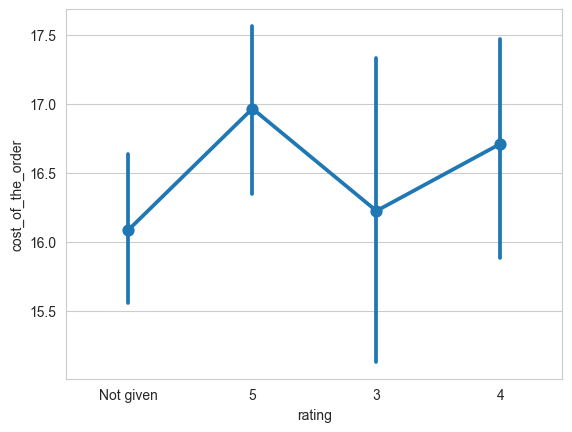

In [16]:
sns.pointplot(data=df, x="rating", y="cost_of_the_order")

In [17]:
#Top Rated Cuisine
top_ratings = df["rating"][~df["rating"].isin(["Not given"])].value_counts().index.to_list()[0:1]
print(top_ratings)
df_top_rated_cusine = df[df["rating"].isin(top_ratings)].reset_index()[["cuisine_type"]].value_counts()
print(df_top_rated_cusine)

['5']
cuisine_type  
American          174
Japanese          142
Italian            90
Chinese            69
Indian             32
Mexican            26
Mediterranean      16
Middle Eastern     13
Thai                6
French              5
Southern            5
Spanish             5
Korean              3
Vietnamese          2
dtype: int64


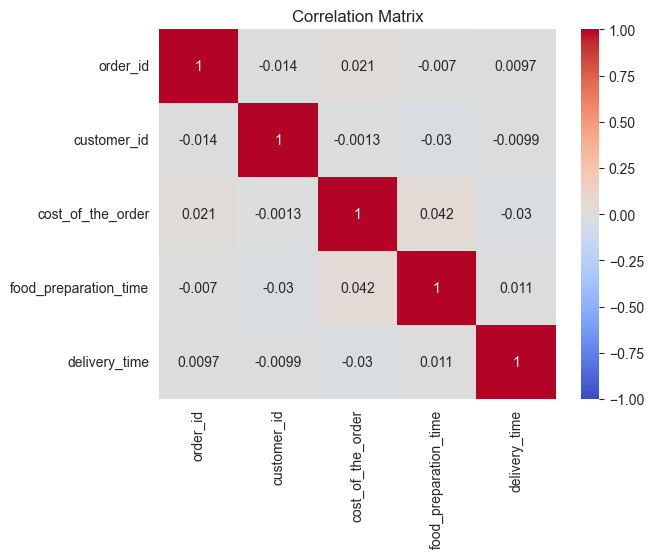

In [18]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

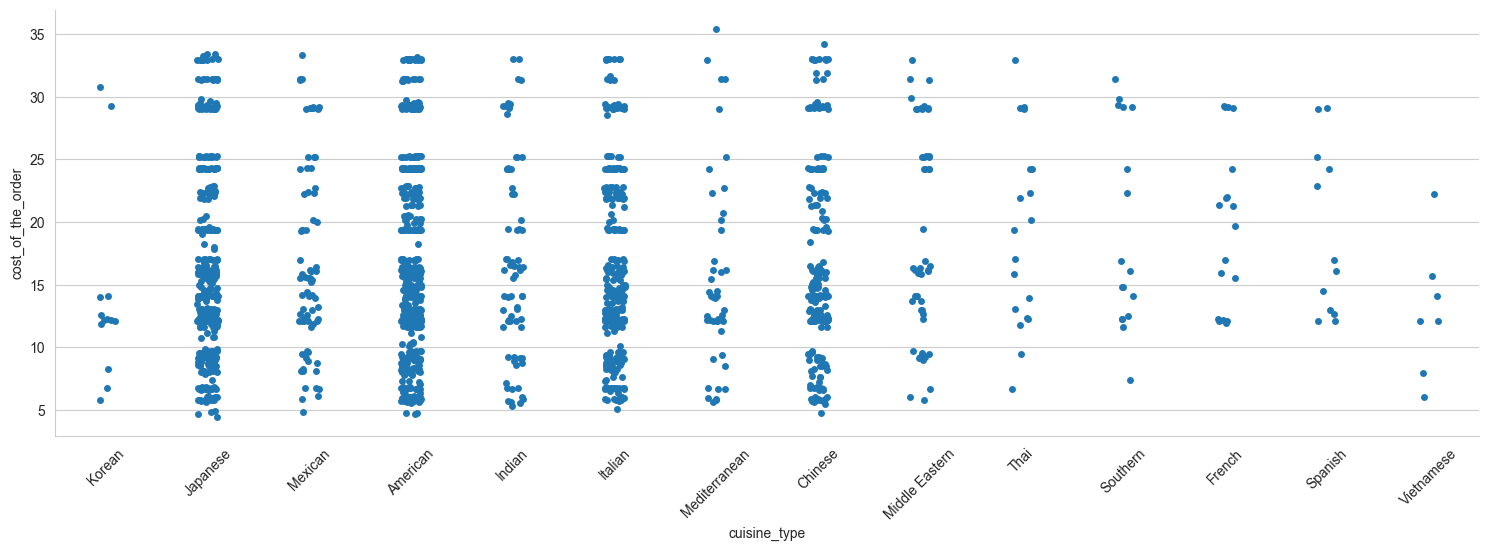

In [19]:
# Scater plot 
sns.catplot(data=df, x="cuisine_type", y="cost_of_the_order", height=5, aspect=3)
plt.xticks(rotation=45)
plt.show()

      cuisine_type  avg_order_cost
2           French       19.793889
10        Southern       19.300588
12            Thai       19.207895
11         Spanish       18.994167
9   Middle Eastern       18.820612
8          Mexican       16.933117
3           Indian       16.919726
4          Italian       16.418691
0         American       16.319829
1          Chinese       16.305209
5         Japanese       16.304532
7    Mediterranean       15.474783
6           Korean       14.001538
13      Vietnamese       12.882857


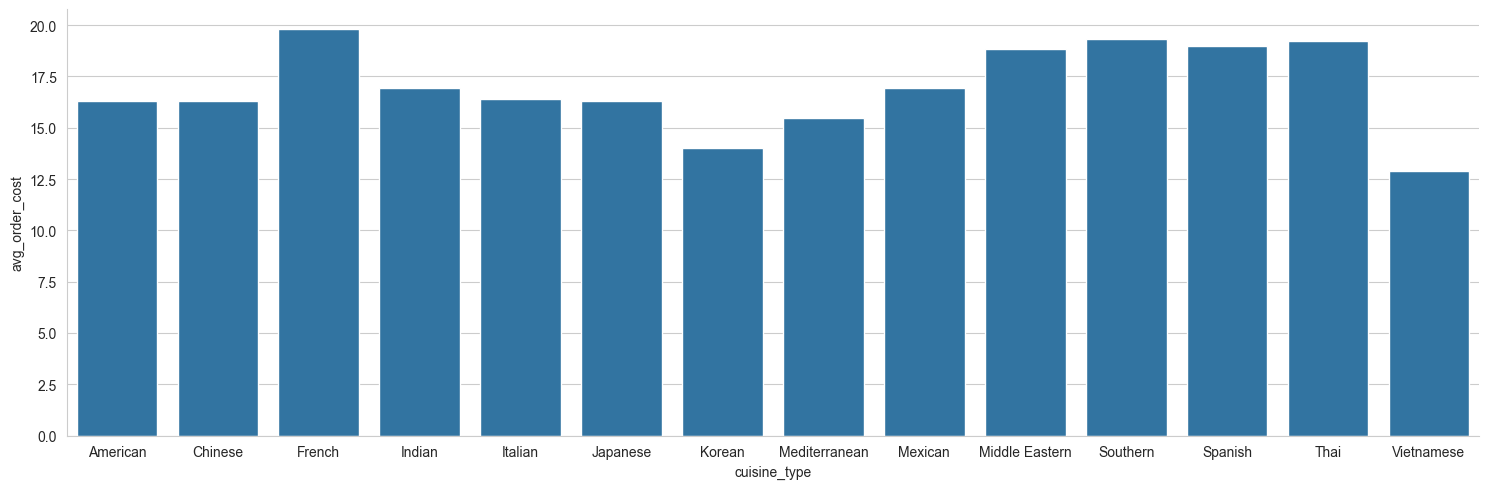

In [20]:
# Avg cost per cuisine 
df_avg_cuisine = df.groupby("cuisine_type")["cost_of_the_order"].mean().reset_index().rename(columns={'cost_of_the_order':'avg_order_cost'})
print(df_avg_cuisine.sort_values(by="avg_order_cost", ascending=False))
sns.catplot(data=df_avg_cuisine, x="cuisine_type", y="avg_order_cost",  kind="bar", height=5, aspect=3)
plt.show()



Average cost of cuisine = 16.498851422550054


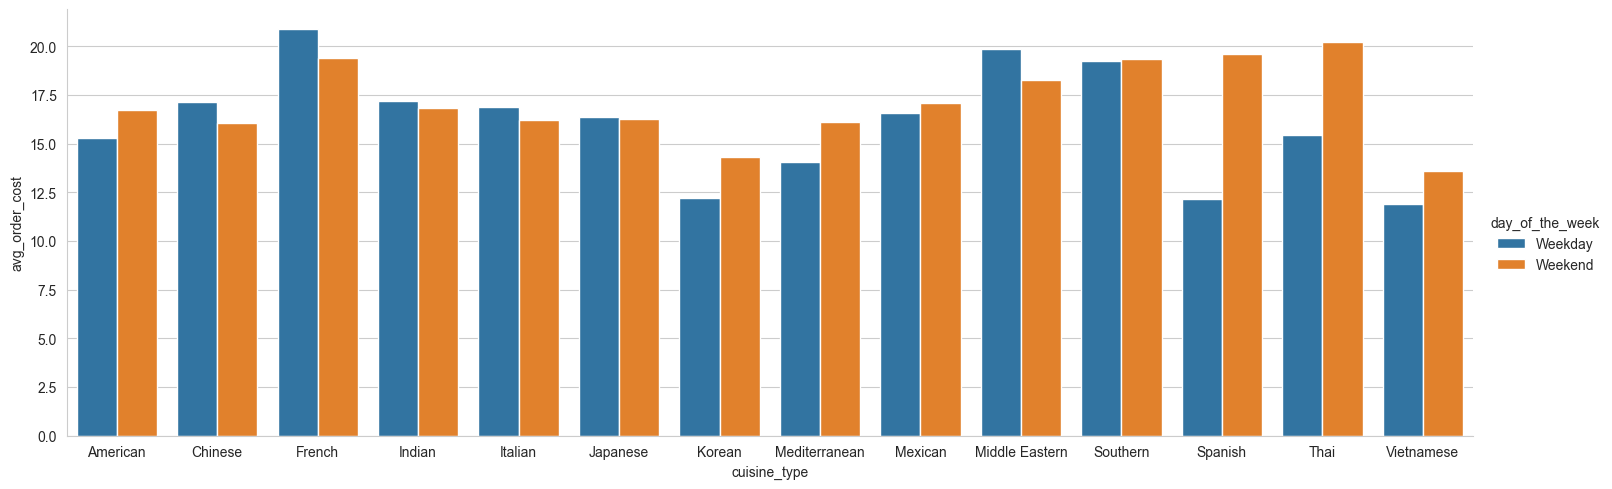

In [21]:
print("Average cost of cuisine = {}".format(df['cost_of_the_order'].mean()))
df_avg_cuisine_by_day = df.groupby(["cuisine_type", "day_of_the_week"])["cost_of_the_order"].mean().reset_index().rename(columns={'cost_of_the_order':'avg_order_cost'})
df_avg_cuisine_by_day.head()
sns.catplot(data=df_avg_cuisine_by_day, x="cuisine_type", y="avg_order_cost", hue="day_of_the_week", kind="bar", height=5, aspect=3)
#plt.show()


In [22]:
#Top N restaurant in term of order recieve
# df_to_restaurant = df.groupby("restaurant_name")["order_id"].count().reset_index().rename(columns={"order_id":"total_order"}).sort_values(by="total_order", ascending=False).reset_index().head(5)
# print(df_to_restaurant[["restaurant_name", "total_order"]])

print(df["restaurant_name"].value_counts()[:5])

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


In [23]:
#Most popular cuisine during weekend
print(df[df["day_of_the_week"] == 'Weekend']["cuisine_type"].value_counts()[:5])


American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64


In [24]:
# % of orders cost more than 20 dollar
total_order = df['order_id'].nunique()
#print(total_order)
percentage_of_order_over_20_dollar = df[df['cost_of_the_order'] > 20]['order_id'].nunique()/total_order * 100
print("Percentage of order over $20 = {}".format(percentage_of_order_over_20_dollar))

Percentage of order over $20 = 29.24130663856691


In [25]:
# Mean order delivery time
print(df['delivery_time'].mean())

24.161749209694417


In [26]:
#Top N customer
N=5
#df_top_N = df.groupby("customer_id")["order_id"].count().reset_index().rename(columns={"order_id":"total_order"}).sort_values(by="total_order", ascending=False).reset_index().head(N)
#print(df_top_N)

print(df["customer_id"].value_counts()[:N])

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64


In [27]:
#Finding the net revenue

total_revenue = df['cost_of_the_order'].apply(lambda x: x * .25 if x > 20 else ( x * .15 if x > 5 else 0)).sum()
print("Total revenue = {}".format(total_revenue))

Total revenue = 6166.303


In [28]:
#mean delivery time

df_delivery=df.groupby("day_of_the_week")["delivery_time"].mean().reset_index().rename(columns={"delivery_time":"Avg delivery time (min)"})
print(df_delivery.to_string(index=False))

day_of_the_week  Avg delivery time (min)
        Weekday                28.340037
        Weekend                22.470022


In [29]:
import numpy as np
#Rating impute missing value
# We will fill null rating with the floor of mean rating by each restarurant
df["rating_ft"] = df["rating"].apply(lambda x: None if x == "Not given" else float(x)) 
df["rating_ft"] = df.groupby('restaurant_name')['rating_ft'].transform(lambda x: x.fillna(np.floor(x.mean())))
df.describe()


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,rating_ft
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1868.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749,4.226981
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637,0.631167
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000,3.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000,4.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000,4.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000,5.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000,5.000000


In [30]:
min_rating = df["rating_ft"].describe()['min']

In [31]:
print(min_rating)

3.0


In [32]:
#df.loc[df["rating_ft"].isnull(),"rating_ft"] = min_rating 
#df.describe()
still_null = df["rating_ft"].isnull().sum()
if (still_null > 0):
    print("There are {} orders with unrated/null".format(still_null))
    df["rating_ft"] = df["rating_ft"].fillna(value=df["rating_ft"].min())
df.describe()


There are 30 orders with unrated/null


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,rating_ft
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749,4.207587
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637,0.644596
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000,3.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000,4.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000,4.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000,5.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000,5.000000


rating_ft is numeric. Data type: float64


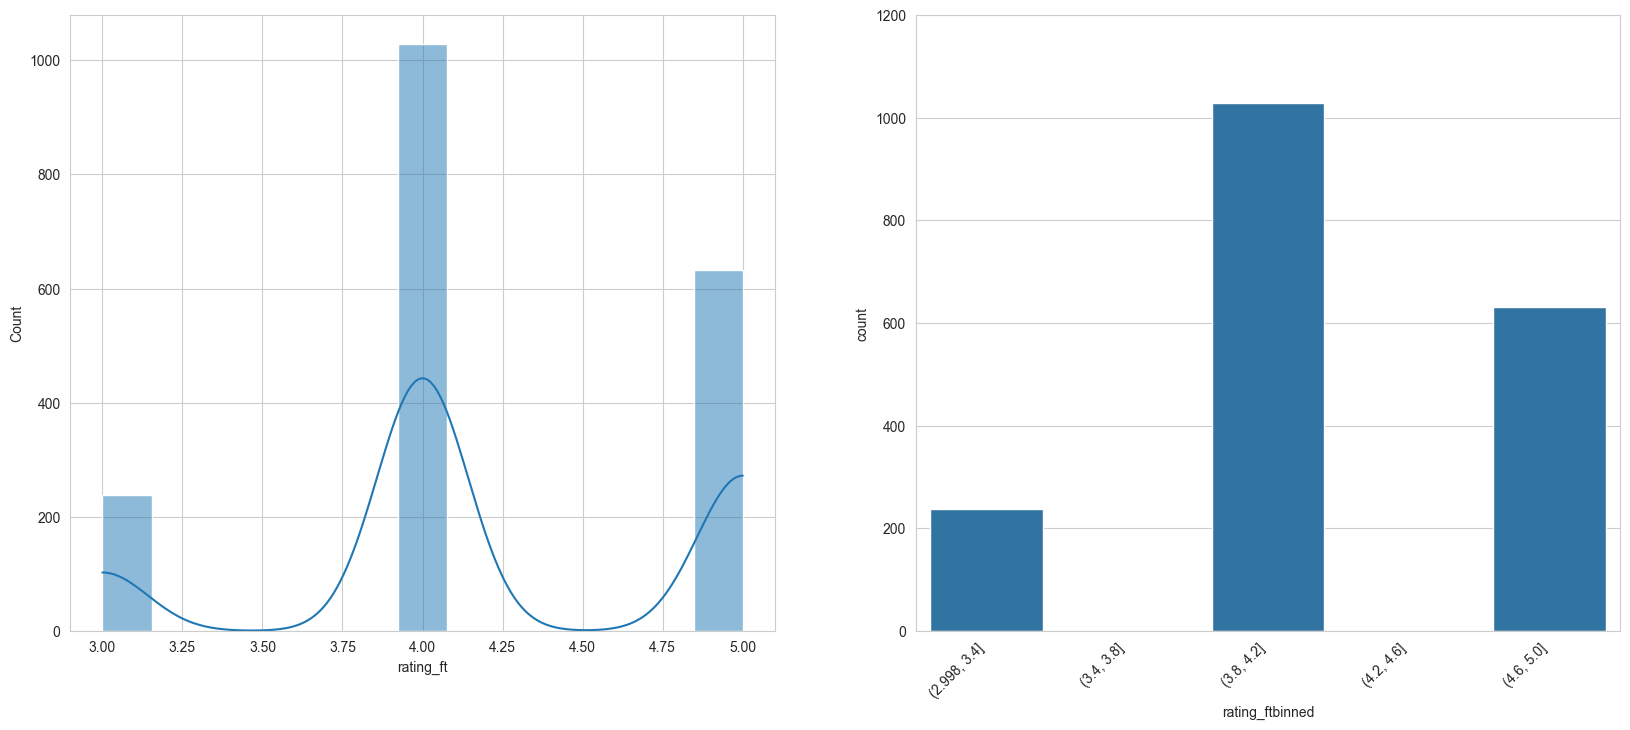

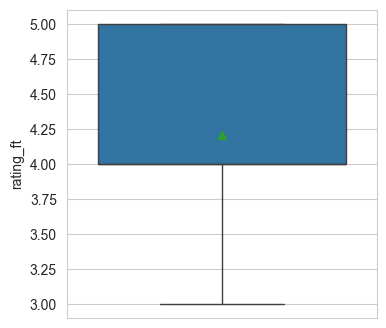

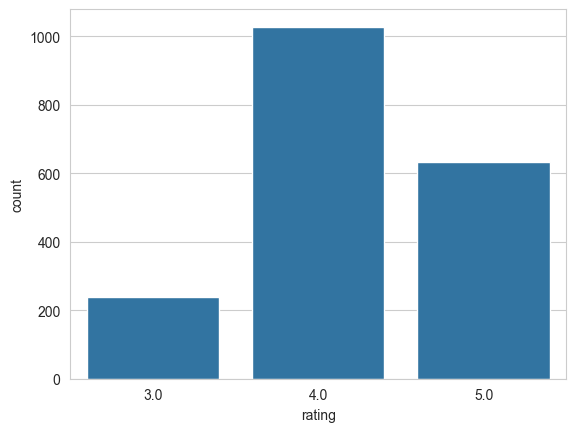

In [33]:
show_stat(df, "rating_ft", bins=5)
sns.countplot(data=df, x="rating_ft")
plt.xlabel('rating')
plt.show()


In [34]:
# Customer analysis
N=20
# Top N customer and their order
df_top_N = df["customer_id"].value_counts()[:N]
print(df_top_N)

52832     13
47440     10
83287      9
250494     8
259341     7
82041      7
65009      7
276192     7
97079      6
97991      6
107909     6
275689     6
60052      6
115213     6
301032     5
241719     5
97806      5
142461     5
94152      5
232035     5
Name: customer_id, dtype: int64


In [39]:
# Total unique custorm
total_unique_customer = df["customer_id"].nunique()
print("Total unique customer = {}".format(total_unique_customer))
# %of total order by top 20 customer
total_order = df["order_id"].count()
print("Total order = {}".format(total_order))
total_order_by_top_N = df_top_N.reset_index().rename(columns={"customer_id": "total_order"})["total_order"].sum()
print("Total of order place by top {} customer = {}".format(N, total_order_by_top_N))
print("Percentage of order place by top {} customer = {:.2%}".format(N, total_order_by_top_N/total_order))

# Customer with 1 order only
df_cust= df.groupby("customer_id")["order_id"].count().reset_index().rename(columns={"order_id": "total_order"})
#df_delivery=df.groupby("day_of_the_week")["delivery_time"].mean().reset_index().rename(columns={"delivery_time":"Avg delivery time (min)"})
total_customer_with_one_order = df_cust[df_cust["total_order"] == 1]["customer_id"].count()

print("Percentage of customer who place only one order = {:.2%}".format(total_customer_with_one_order/total_unique_customer))
print("Total customer placing only one order = {}".format(total_customer_with_one_order))
print("Percentage of orders place by customer who order one = {:.2%}".format(total_customer_with_one_order/total_order))



Total unique customer = 1200
Total order = 1898
Total of order place by top 20 customer = 134
Percentage of order place by top 20 customer = 7.06%
Percentage of customer who place only one order = 65.33%
Total customer placing only one order = 784
Percentage of orders place by customer who order one = 41.31%


In [41]:
N=20
# Top N restaurant and their order
df_top_N_restaurant = df["restaurant_name"].value_counts()[:N]
print(df_top_N_restaurant)

Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Nobu Next Door                    42
Rubirosa                          37
Sushi of Gari 46                  37
Momoya                            30
Five Guys Burgers and Fries       29
Blue Ribbon Sushi Izakaya         29
Bareburger                        27
Tamarind TriBeCa                  27
Jack's Wife Freda                 25
Sushi of Gari Tribeca             24
Name: restaurant_name, dtype: int64


In [42]:
# Restaurant analysis

#top N restaurant who has the most order
# Total unique restaurant
total_unique_restaurant = df["restaurant_name"].nunique()
print("Total unique restaurant = {}".format(total_unique_restaurant))
# %of total order by top 20 restaurant
total_order = df["order_id"].count()
print("Total order = {}".format(total_order))
total_order_by_top_N_restaurant = df_top_N_restaurant.reset_index().rename(columns={"restaurant_name": "total_order"})["total_order"].sum()

print("Total of order recieved by top {} restaurant = {}".format(N, total_order_by_top_N_restaurant))
print("Percentage of order recieved by top {} restaurant = {:.2%}".format(N, total_order_by_top_N_restaurant/total_order))



# restaurant with 1 order only
df_rest= df.groupby("restaurant_name")["order_id"].count().reset_index().rename(columns={"order_id": "total_order"})
total_restaurnat_with_one_order = df_rest[df_rest["total_order"] == 1]["restaurant_name"].count()

print("Percentage of restaurant who recieve only one order = {:.2%}".format(total_restaurnat_with_one_order/total_unique_restaurant))
print("Total restaurant having only one order = {}".format(total_restaurnat_with_one_order))
print("Percentage of orders recieved by restaurant with only one order = {:.2%}".format(total_restaurnat_with_one_order/total_order))


Total unique restaurant = 178
Total order = 1898
Total of order recieved by top 20 restaurant = 1194
Percentage of order recieved by top 20 restaurant = 62.91%
Percentage of restaurant who recieve only one order = 28.09%
Total restaurant having only one order = 50
Percentage of orders recieved by restaurant with only one order = 2.63%


In [ ]:
df_top_N_restaurant_list = df_top_N_restaurant.index.to_list()

# Plot graph for weekday and weekend order for top N restaurant
plt.figure(figsize=(15, 6))
sns.countplot(data=df[df["restaurant_name"].isin(df_top_N_restaurant_list)], x="restaurant_name", hue="day_of_the_week")
plt.xlabel("Top {} Restaurnat".format(N))
plt.xticks(rotation=90)
plt.show()


In [ ]:
# restaurant with average rating > 4 and total rating >50
df.describe(include='all')
df["rating_conv"] = df["rating"].apply(lambda x: None if x == "Not given" else float(x))
df_rating = df.groupby("restaurant_name").agg(total_rating=('rating_conv', 'count'), avg_rating=('rating_conv', 'mean'))
df_rating = df_rating[(df_rating["total_rating"] > 50) & (df_rating["avg_rating"] > 4)]
print(df_rating)

In [ ]:
df.describe(include='all')